In [1]:
from Project1_Code import *
import matplotlib.pyplot as plt

# Mathematics for Machine Learning

In [5]:
A = np.array([[1, 1, 1, 0, 10],
              [1, 1, 0, 1, 4],
              [0, 0, 1, -3, 0.5],
              [0, 0, -3, 1, 30],
              [0, 1000, 1, 0, 50]])

U, S, Vh = np.linalg.svd(A)

A_k = get_low_rank(U, S, Vh, 2)


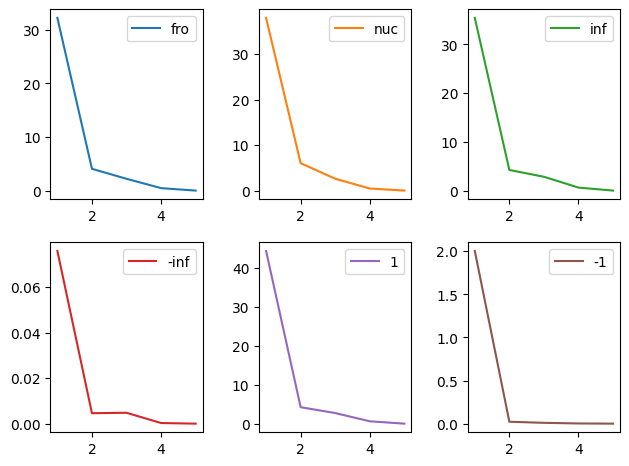

In [13]:
list = ['fro', 'nuc', np.inf, -np.inf, 1 , -1]
colors = plt.rcParams["axes.prop_cycle"]()

X = range(1, np.size(S) + 1)

figure, axis = plt.subplots(2, 3)
figure.tight_layout(pad = 1.0)

i = 0
j = 0

for norm in list:
    c = next(colors)["color"]
    axis[i, j].plot(X, get_errors(A, U, S, Vh, norm)[0], label=norm, color=c)
    axis[i, j].legend()
    j = j + 1
    if j % 3 == 0:
        j = 0
        i = i + 1

#axis[3, 1].plot(X, get_errors(A, U, S, Vh, 'fro')[1], label='sqrd')
plt.show()

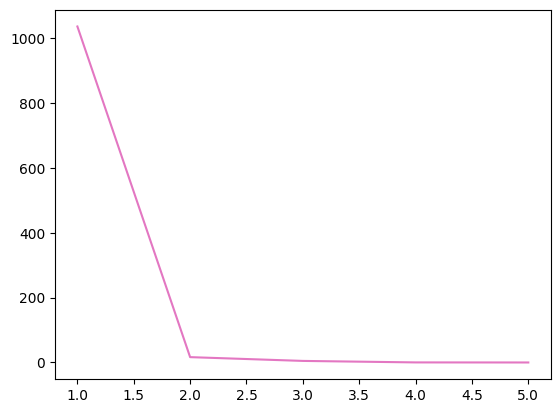

In [14]:
c = next(colors)["color"]
plt.plot(X, get_errors(A, U, S, Vh, norm)[1], label=norm, color=c)
